In [1]:
sc.install_pypi_package("pandas==2.0.2")
sc.install_pypi_package("matplotlib")
# sc.install_pypi_package("seaborn")
# sc.install_pypi_package("tensorflow==2.15.0")
sc.install_pypi_package("boto3")
sc.install_pypi_package("pyarrow==14.0.2")
sc.install_pypi_package("pillow==9.4.0")
# sc.install_pypi_package("opencv-python")
sc.install_pypi_package("plotly")

VBox()

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,User,Current session?
1,application_1718259089572_0002,pyspark,idle,Link,Link,None,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

  Attempting uninstall: python-dateutil
    Found existing installation: python-dateutil 2.8.1
    Not uninstalling python-dateutil at /usr/lib/python3.9/site-packages, outside environment /mnt1/yarn/usercache/livy/appcache/application_1718259089572_0002/container_1718259089572_0002_01_000001/tmp/spark-d207fd6c-bc39-4701-a50c-2cea984e9aa3
    Can't uninstall 'python-dateutil'. No files were found to uninstall.




  Attempting uninstall: pillow
    Found existing installation: pillow 10.3.0
    Uninstalling pillow-10.3.0:
      Successfully uninstalled pillow-10.3.0


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
awscli 2.15.30 requires python-dateutil<=2.8.2,>=2.1, but you have python-dateutil 2.9.0.post0 which is incompatible.






In [2]:
import io
from io import BytesIO
import os
from glob import glob
import numpy as np
import pandas as pd
import boto3
from PIL import Image
import matplotlib.pyplot as plt

# from pyspark.ml import Pipeline
# from pyspark.ml.feature import PCA, StandardScaler, VectorAssembler
# from pyspark.ml.linalg import Vector, Vectors, VectorUDT
# from pyspark.ml.functions import array_to_vector

# from pyspark.sql import Row, SparkSession
# from pyspark.sql import functions as F
# from pyspark.sql.types import ArrayType, DoubleType, FloatType, StringType
# from pyspark.sql.types import StructType, StructField, StringType, IntegerType

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [3]:
df_images = spark.read.format("image").option("dropInvalid", True).load("s3a://bdcc2024-cpt5-finalproject/1mcats")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [4]:
df_images.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- image: struct (nullable = true)
 |    |-- origin: string (nullable = true)
 |    |-- height: integer (nullable = true)
 |    |-- width: integer (nullable = true)
 |    |-- nChannels: integer (nullable = true)
 |    |-- mode: integer (nullable = true)
 |    |-- data: binary (nullable = true)

In [7]:
def height_dist():
    heights = df_images.select("image.height").rdd.flatMap(lambda x: x).collect()
    plt.figure(figsize=(10, 6))
    plt.hist(heights, bins=20, edgecolor='black')
    plt.title('Height Distribution')
    plt.xlabel('Height')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()
    
height_dist()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

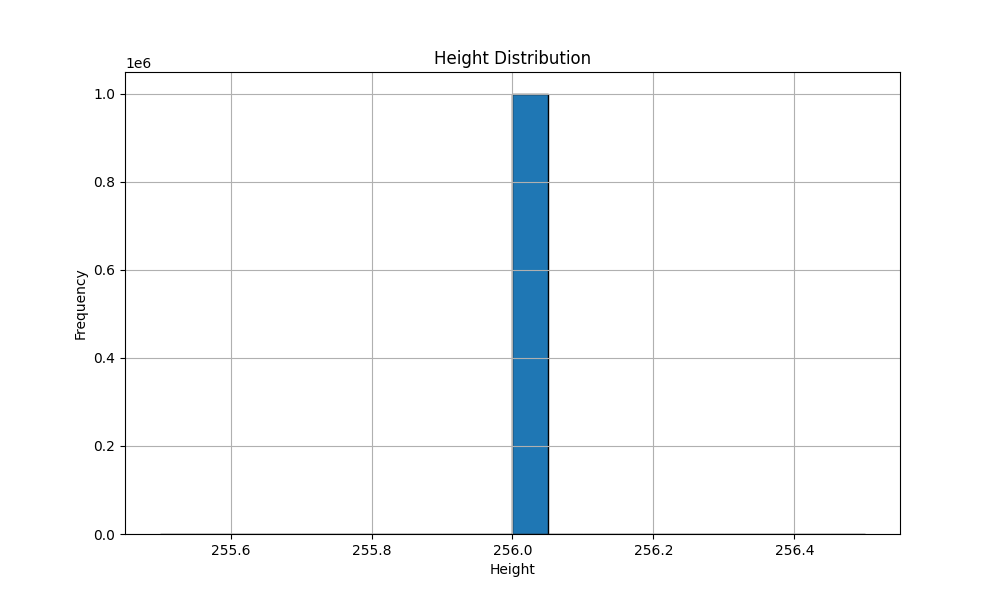

In [10]:
%matplot plt

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

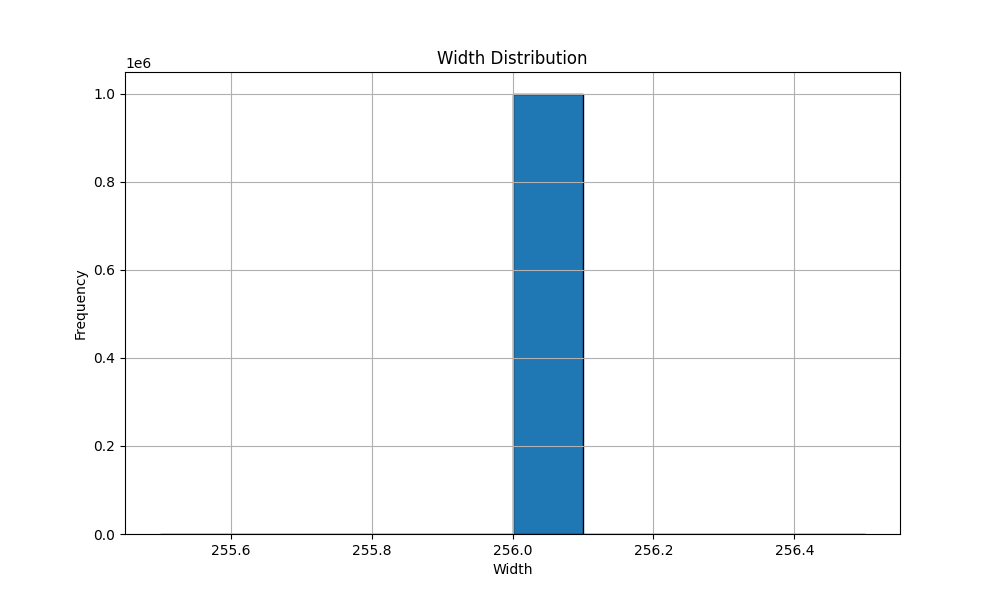

In [11]:
def width_dist():
    widths = df_images.select("image.width").rdd.flatMap(lambda x: x).collect()
    plt.figure(figsize=(10, 6))
    plt.hist(widths, bins=10, edgecolor='black')
    plt.title('Width Distribution')
    plt.xlabel('Width')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()
    
width_dist()
%matplot plt

In [15]:
df_images.select('image.nChannels', 'image.mode').summary().show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------+--------------------+--------------------+
|summary|           nChannels|                mode|
+-------+--------------------+--------------------+
|  count|              999994|              999994|
|   mean|  3.0000010000060002|  16.000008000048002|
| stddev|0.001000003000013...|0.008000024000107974|
|    min|                   3|                  16|
|    25%|                   3|                  16|
|    50%|                   3|                  16|
|    75%|                   3|                  16|
|    max|                   4|                  24|
+-------+--------------------+--------------------+